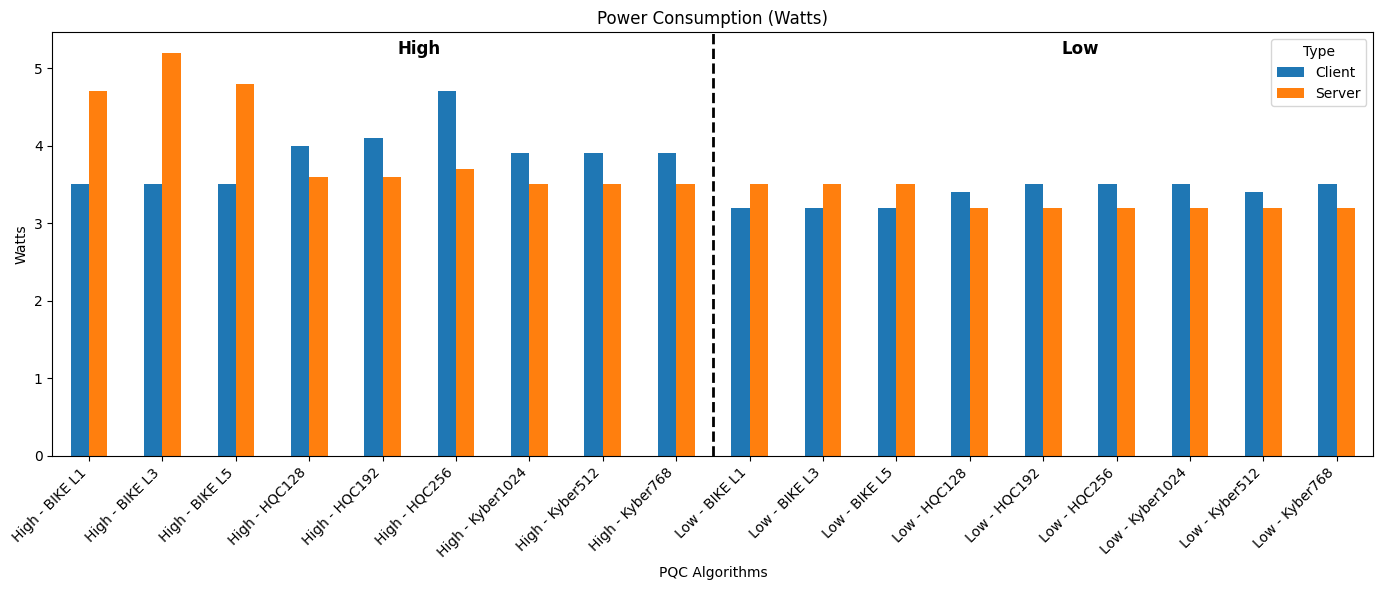

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv("pw2.csv")

# Set ordered category
df['Category'] = pd.Categorical(df['Category'], categories=['High', 'Low'], ordered=True)

# Create label: "High - Kyber512"
df['Label'] = df['Category'].astype(str) + ' - ' + df['Benchmark']

# Sort: High first, then Low
df.sort_values(['Category', 'Benchmark', 'Type'], inplace=True)

# Pivot table
pivot_df = df.pivot_table(index='Label', columns='Type', values='Watts', aggfunc='mean')

# Plot
ax = pivot_df.plot(kind="bar", figsize=(14, 6))
plt.ylabel("Watts")
plt.xlabel("PQC Algorithms")
plt.title("Power Consumption (Watts)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle=" ", alpha=0.7)

# 🧠 Count how many unique High labels exist
high_labels = df[df['Category'] == 'High']['Benchmark'].unique()
high_count = len(high_labels)

# Draw dashed line *after* the last High group
ax.axvline(x=high_count - 0.5, linestyle='--', color='black', linewidth=2)

# Add section labels at the top
plt.text(high_count / 2, ax.get_ylim()[1] * 0.95, 'High', ha='center', fontsize=12, fontweight='bold')
plt.text(high_count + (len(pivot_df) - high_count) / 2, ax.get_ylim()[1] * 0.95, 'Low', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig("power_plot.png", dpi=300, bbox_inches='tight')
plt.show()
